In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img, save_img
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tqdm import tqdm

# === Class names in your preferred order ===
classes = ['BROWNSPOT', 'HEALTHY', 'HISPA', 'LEAFBLAST']

# === Paths ===
input_train_path = "/kaggle/input/split-dataset-5/split_dataset_5/train-20250510T150804Z-001/train"
augmented_output_path = "/kaggle/working/augmented_train"
features_save_path = "/kaggle/working/augmented_train_features.npy"
labels_save_path = "/kaggle/working/augmented_train_labels.npy"
csv_save_path = "/kaggle/working/augmented_train_features.csv"

# === Create class folders for augmented output ===
for cls in classes:
    os.makedirs(os.path.join(augmented_output_path, cls), exist_ok=True)

# === Augmentation settings ===
augment_gen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# === Step 1: Augment and Save Images ===
augmentations_per_image = 2  # You can change this

print("🚀 Starting augmentation...")
for cls in classes:
    src_cls_path = os.path.join(input_train_path, cls)
    dst_cls_path = os.path.join(augmented_output_path, cls)

    images = os.listdir(src_cls_path)

    for img_file in tqdm(images, desc=f"Augmenting {cls}"):
        img_path = os.path.join(src_cls_path, img_file)
        image = load_img(img_path, target_size=(224, 224))
        x = img_to_array(image)
        x = x.reshape((1,) + x.shape)
        x = preprocess_input(x)

        aug_iter = augment_gen.flow(x, batch_size=1)
        for i in range(augmentations_per_image):
            aug_img_arr = next(aug_iter)[0].astype('uint8')
            aug_img = array_to_img(aug_img_arr)
            save_name = f"aug_{os.path.splitext(img_file)[0]}_{i}.jpg"
            save_path = os.path.join(dst_cls_path, save_name)
            aug_img.save(save_path)

print("✅ Augmented images saved.")

# === Step 2: Feature Extraction on Augmented Images ===

print("🧠 Starting feature extraction...")
resnet = ResNet50(include_top=False, weights='imagenet', pooling='avg', input_shape=(224, 224, 3))
model = Model(inputs=resnet.input, outputs=resnet.output)

# Image generator for augmented images
fe_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

fe_data = fe_gen.flow_from_directory(
    augmented_output_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Extract features
features = model.predict(fe_data, verbose=1)
labels = fe_data.classes

# Save as .npy
np.save(features_save_path, features)
np.save(labels_save_path, labels)

# Save as CSV
df = pd.DataFrame(features)
df['label'] = labels
df.to_csv(csv_save_path, index=False)

print("✅ Feature extraction from augmented images complete and saved.")


In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tqdm import tqdm

# === Paths ===
input_train_path = /kaggle/input/train-5/train
augmented_output_path = "/kaggle/working/augmented_train"

# Create augmented output directories
for cls in os.listdir(input_train_path):
    os.makedirs(os.path.join(augmented_output_path, cls), exist_ok=True)

# === Augmentation settings ===
augment_gen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# === Step 1: Augment and Save ===
num_augmented_per_class = 500  # You can tune this

for cls in os.listdir(input_train_path):
    src_cls_path = os.path.join(input_train_path, cls)
    dst_cls_path = os.path.join(augmented_output_path, cls)

    # Check if the source class folder exists
    if not os.path.exists(src_cls_path):
        print(f"❌ The folder for class {cls} does not exist. Skipping.")
        continue

    images = os.listdir(src_cls_path)
    generated = 0

    for img_file in tqdm(images, desc=f"Augmenting {cls}"):
        if generated >= num_augmented_per_class:
            break
        img_path = os.path.join(src_cls_path, img_file)
        image = load_img(img_path, target_size=(224, 224))
        x = img_to_array(image)
        x = x.reshape((1,) + x.shape)
        x = preprocess_input(x)

        aug_iter = augment_gen.flow(x, batch_size=1)
        aug_img_arr = next(aug_iter)[0].astype('uint8')
        aug_img = array_to_img(aug_img_arr)

        save_name = f"aug_{generated}_{img_file}"
        aug_img.save(os.path.join(dst_cls_path, save_name))
        generated += 1

print("✅ Augmented images saved.")


In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tqdm import tqdm

# === Paths ===
input_train_path = "/kaggle/input/train-5/train"
augmented_output_path = "/kaggle/working/augmented_train"
csv_output_path = "/kaggle/working/augmented_features.csv"

# Create augmented output directories
for cls in os.listdir(input_train_path):
    os.makedirs(os.path.join(augmented_output_path, cls), exist_ok=True)

# === Augmentation settings ===
augment_gen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# === Step 1: Augment and Save ===
num_augmented_per_class = 2000  # Updated to 2000

for cls in os.listdir(input_train_path):
    src_cls_path = os.path.join(input_train_path, cls)
    dst_cls_path = os.path.join(augmented_output_path, cls)

    if not os.path.exists(src_cls_path):
        print(f"❌ Folder for class {cls} does not exist. Skipping.")
        continue

    images = os.listdir(src_cls_path)
    generated = 0

    for img_file in tqdm(images, desc=f"Augmenting {cls}"):
        img_path = os.path.join(src_cls_path, img_file)
        
        # ✅ Skip subdirectories
        if os.path.isdir(img_path):
            continue
        
        if generated >= num_augmented_per_class:
            break
        
        image = load_img(img_path, target_size=(224, 224))
        x = img_to_array(image)
        x = x.reshape((1,) + x.shape)
        x = preprocess_input(x)

        aug_iter = augment_gen.flow(x, batch_size=1)
        aug_img_arr = next(aug_iter)[0].astype('uint8')
        aug_img = array_to_img(aug_img_arr)

        save_name = f"aug_{generated}_{img_file}"
        aug_img.save(os.path.join(dst_cls_path, save_name))
        generated += 1

print("✅ Augmented images saved.")

# === Step 2: Feature Extraction using ResNet50 ===
print("🔍 Extracting features...")

base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
features = []
labels = []

for cls in os.listdir(augmented_output_path):
    cls_path = os.path.join(augmented_output_path, cls)
    
    for img_file in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_file)
        
        if os.path.isdir(img_path):
            continue
        
        image = load_img(img_path, target_size=(224, 224))
        x = img_to_array(image)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        feat = base_model.predict(x)
        features.append(feat.flatten())
        labels.append(cls)

# === Save to CSV ===
df = pd.DataFrame(features)
df['label'] = labels
df.to_csv(csv_output_path, index=False)
print(f"✅ Features saved to CSV at {csv_output_path}")


In [ ]:
import pandas as pd

# === Paths ===
original_csv_path = '/kaggle/input/train-features/train_features.csv'  # update if needed
augmented_csv_path = '/kaggle/working/augmented_features.csv'
merged_csv_path = '/kaggle/working/merged_train_features.csv'

# === Load CSVs ===
original_df = pd.read_csv(original_csv_path)
augmented_df = pd.read_csv(augmented_csv_path)

# === Check for label column consistency ===
if 'label' not in original_df.columns or 'label' not in augmented_df.columns:
    raise ValueError("Missing 'label' column in one of the CSV files.")

# === Concatenate datasets ===
merged_df = pd.concat([original_df, augmented_df], ignore_index=True)

# === Save the merged file ===
merged_df.to_csv(merged_csv_path, index=False)

print(f"✅ Merged CSV saved at: {merged_csv_path}")


In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, classification_report
import lightgbm as lgb

# === Load CSVs ===
train_df = pd.read_csv('/kaggle/working/merged_train_features.csv')
val_df = pd.read_csv('/kaggle/input/validation-features/validation_features.csv')
test_df = pd.read_csv('/kaggle/input/test-features/test_features.csv')

# === Handle mixed labels before encoding (correctly map strings to integers) ===
label_map = {
    'HEALTHY': 1,
    'HISPA': 2,
    '3': 3  # In case '3' is a string
}

train_df['label'] = train_df['label'].replace(label_map)
val_df['label'] = val_df['label'].replace(label_map)
test_df['label'] = test_df['label'].replace(label_map)

# === Ensure all labels are integers ===
train_df['label'] = train_df['label'].astype(int)
val_df['label'] = val_df['label'].astype(int)
test_df['label'] = test_df['label'].astype(int)

# === Check classes ===
print("Train Labels (after cleaning):", train_df['label'].unique())
print("Validation Labels (after cleaning):", val_df['label'].unique())
print("Test Labels (after cleaning):", test_df['label'].unique())

# === Split features and labels ===
X_train = train_df.drop(columns=['label'])
y_train = train_df['label']

X_val = val_df.drop(columns=['label'])
y_val = val_df['label']

X_test = test_df.drop(columns=['label'])
y_test = test_df['label']

# === Scale features ===
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# === LightGBM parameters ===
params = {
    'objective': 'multiclass',
    'num_class': 4,  # ✅ only 4 classes
    'metric': 'multi_logloss',
    'boosting': 'gbdt',
    'class_weight': 'balanced',
    'verbosity': -1,
    'learning_rate': 0.05,
    'num_leaves': 74,
    'max_depth': 10,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'seed': 42
}

# === LightGBM Datasets ===
train_data = lgb.Dataset(X_train_scaled, label=y_train)
val_data = lgb.Dataset(X_val_scaled, label=y_val)

# === Train model ===
lgb_model = lgb.train(params,
                      train_data,
                      num_boost_round=1000,
                      valid_sets=[val_data],
                      callbacks=[lgb.early_stopping(stopping_rounds=300)])

# === Predictions ===
y_proba = lgb_model.predict(X_test_scaled)
y_pred = np.argmax(y_proba, axis=1)

# === Evaluation ===
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"\nLightGBM Test Accuracy: {accuracy:.4f}")
print(f"LightGBM Test ROC AUC (OvR): {roc_auc:.4f}")
print(f"LightGBM Test Precision (macro): {precision:.4f}")
print(f"LightGBM Test Recall (macro): {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# === Save model ===
output_dir = '/kaggle/working/'
model_path = os.path.join(output_dir, 'lgbm_model.txt')
lgb_model.save_model(model_path)
print(f'Model saved to {model_path}')


In [ ]:
import os

# Define exact subdirectories for each class
class_dirs = {
    'BROWNSPOT': '/kaggle/input/rice-5/RICE/BROWNSPOT/BROWNSPOT',
    'HEALTHY': '/kaggle/input/rice-5/RICE/HEALTHY/HEALTHY',
    'HISPA': '/kaggle/input/rice-5/RICE/HISPA/HISPA',
    'LEAFBLAST': '/kaggle/input/rice-5/RICE/LEAFBLAST/LEAFBLAST'
}

# Count and print number of images in each class
print("Number of images in each class:")
for class_name, class_path in class_dirs.items():
    image_count = len([
        f for f in os.listdir(class_path) 
        if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ])
    print(f"{class_name}: {image_count}")


In [3]:
import os
import shutil
import random
from pathlib import Path

# Set random seed for reproducibility
random.seed(42)

# Define source paths
class_dirs = {
    'BROWNSPOT': '/kaggle/input/rice-5/RICE/BROWNSPOT/BROWNSPOT',
    'HEALTHY': '/kaggle/input/rice-5/RICE/HEALTHY/HEALTHY',
    'HISPA': '/kaggle/input/rice-5/RICE/HISPA/HISPA',
    'LEAFBLAST': '/kaggle/input/rice-5/RICE/LEAFBLAST/LEAFBLAST'
}

# Define destination root
output_root = '/kaggle/working/split_5'

# Create folders
splits = ['train', 'val', 'test']
for split in splits:
    for class_name in class_dirs:
        Path(os.path.join(output_root, split, class_name)).mkdir(parents=True, exist_ok=True)

# Split and copy images
for class_name, source_dir in class_dirs.items():
    all_images = [
        f for f in os.listdir(source_dir)
        if os.path.isfile(os.path.join(source_dir, f)) and f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]
    random.shuffle(all_images)
    total = len(all_images)

    # Calculate split sizes
    val_size = int(total * 0.20)
    test_size = int(total * 0.10)
    train_size = total - val_size - test_size

    # Split
    train_imgs = all_images[:train_size]
    val_imgs = all_images[train_size:train_size+val_size]
    test_imgs = all_images[train_size+val_size:]

    # Copy to folders with renamed filenames
    for i, fname in enumerate(train_imgs):
        src = os.path.join(source_dir, fname)
        dst = os.path.join(output_root, 'train', class_name, f"train_{class_name}_{i+1}.jpg")
        shutil.copy(src, dst)

    for i, fname in enumerate(val_imgs):
        src = os.path.join(source_dir, fname)
        dst = os.path.join(output_root, 'val', class_name, f"val_{class_name}_{i+1}.jpg")
        shutil.copy(src, dst)

    for i, fname in enumerate(test_imgs):
        src = os.path.join(source_dir, fname)
        dst = os.path.join(output_root, 'test', class_name, f"test_{class_name}_{i+1}.jpg")
        shutil.copy(src, dst)

    print(f"{class_name} - Train: {len(train_imgs)}, Val: {len(val_imgs)}, Test: {len(test_imgs)}")

print("\n✅ Splitting complete! Files saved to /kaggle/working/split_dataset_5/")


BROWNSPOT - Train: 15671, Val: 4477, Test: 2238
HEALTHY - Train: 16570, Val: 4734, Test: 2367
HISPA - Train: 15519, Val: 4434, Test: 2217
LEAFBLAST - Train: 16548, Val: 4728, Test: 2364

✅ Splitting complete! Files saved to /kaggle/working/split_dataset_5/


In [5]:
import os
from PIL import Image
import numpy as np
from pathlib import Path

input_root = '/kaggle/working/split_5'
output_root = '/kaggle/working/normalized_dataset_5'

splits = ['train', 'val', 'test']
classes = ['BROWNSPOT', 'HEALTHY', 'HISPA', 'LEAFBLAST']

target_size = (224, 224)  # Width, Height for ResNet input

# Create output directories
for split in splits:
    for cls in classes:
        Path(os.path.join(output_root, split, cls)).mkdir(parents=True, exist_ok=True)

# Process and save images
for split in splits:
    for cls in classes:
        input_folder = os.path.join(input_root, split, cls)
        output_folder = os.path.join(output_root, split, cls)

        for img_name in os.listdir(input_folder):
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(input_folder, img_name)
                img = Image.open(img_path).convert('RGB')

                # Resize image to 224x224
                img_resized = img.resize(target_size, Image.BILINEAR)

                # Convert to numpy array and normalize to [0,1]
                img_array = np.array(img_resized).astype(np.float32) / 255.0

                # Save normalized array as compressed .npz file
                save_path = os.path.join(output_folder, img_name.rsplit('.', 1)[0] + '.npz')
                np.savez_compressed(save_path, img_array)

print("✅ Normalization and resizing complete! Normalized arrays saved as compressed .npz files.")


✅ Normalization and resizing complete! Normalized arrays saved as compressed .npz files.


In [6]:
import os
import numpy as np
from PIL import Image
import random
from torchvision import transforms
from pathlib import Path

# Path to normalized .npz files (from your normalization script)
train_dir = '/kaggle/working/normalized_dataset_5/train'
# Output path for augmented images
output_dir = '/kaggle/working/final_augmented_dataset/train'
# Desired number of images per class
TARGET_COUNT = 20000

# Augmentation pipeline
augmentation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(25),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0), interpolation=Image.BICUBIC),
])

# Get class names
classes = [cls for cls in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, cls))]

for cls in classes:
    input_cls_path = os.path.join(train_dir, cls)
    output_cls_path = os.path.join(output_dir, cls)
    Path(output_cls_path).mkdir(parents=True, exist_ok=True)

    # List all .npz files
    npz_files = [f for f in os.listdir(input_cls_path) if f.endswith('.npz')]
    current_count = len(npz_files)
    needed_aug = TARGET_COUNT - current_count

    print(f"\n🔍 {cls}: {current_count} existing, needs {needed_aug} augmented images.")
    
    if needed_aug <= 0:
        print(f"⚠️  Skipping augmentation for {cls} (already sufficient)")
        continue

    # Save original images as .jpg for reference
    for i, file in enumerate(npz_files):
        img_array = np.load(os.path.join(input_cls_path, file))['arr_0']
        img = Image.fromarray((img_array * 255).astype(np.uint8))
        img.save(os.path.join(output_cls_path, f"{cls}_original_{i+1}.jpg"))

    # Augmentation loop
    for i in range(needed_aug):
        random_file = random.choice(npz_files)
        img_array = np.load(os.path.join(input_cls_path, random_file))['arr_0']
        img_uint8 = (img_array * 255).astype(np.uint8)
        augmented_img = augmentation(img_uint8)
        augmented_img.save(os.path.join(output_cls_path, f"{cls}_aug_{i+1}.jpg"))

    print(f"✅ {cls}: {current_count} original + {needed_aug} augmented = {current_count + needed_aug} total")

print("\n🎉 Augmentation complete! Final images saved in:", output_dir)



🔍 HISPA: 15519 existing, needs 4481 augmented images.
✅ HISPA: 15519 original + 4481 augmented = 20000 total

🔍 LEAFBLAST: 16548 existing, needs 3452 augmented images.
✅ LEAFBLAST: 16548 original + 3452 augmented = 20000 total

🔍 HEALTHY: 16570 existing, needs 3430 augmented images.
✅ HEALTHY: 16570 original + 3430 augmented = 20000 total

🔍 BROWNSPOT: 15671 existing, needs 4329 augmented images.
✅ BROWNSPOT: 15671 original + 4329 augmented = 20000 total

🎉 Augmentation complete! Final images saved in: /kaggle/working/final_augmented_dataset/train


In [7]:
import os
import shutil
from pathlib import Path

# Source directories
augmented_train = '/kaggle/working/final_augmented_dataset/train'
normalized_val = '/kaggle/working/normalized_dataset_5/val'
normalized_test = '/kaggle/working/normalized_dataset_5/test'

# Destination (merged) dataset directory
merged_root = '/kaggle/working/merged_dataset'
os.makedirs(merged_root, exist_ok=True)

# 1. Copy train from augmented dataset
dst_train = os.path.join(merged_root, 'train')
if not os.path.exists(dst_train):
    shutil.copytree(augmented_train, dst_train)
    print(f"✅ Copied train/ from augmented dataset.")
else:
    print(f"⚠️  train/ already exists in merged dataset, skipping.")

# 2. Copy val and test from normalized dataset
for split, src in [('val', normalized_val), ('test', normalized_test)]:
    dst = os.path.join(merged_root, split)
    if not os.path.exists(dst):
        shutil.copytree(src, dst)
        print(f"✅ Copied {split}/ from normalized dataset.")
    else:
        print(f"⚠️  {split}/ already exists in merged dataset, skipping.")

print("\n🎉 Merging complete! Your merged dataset is at:", merged_root)


✅ Copied train/ from augmented dataset.
✅ Copied val/ from normalized dataset.
✅ Copied test/ from normalized dataset.

🎉 Merging complete! Your merged dataset is at: /kaggle/working/merged_dataset


In [8]:
import os

merged_root = '/kaggle/working/merged_dataset'

print("🔍 Counting files in merged dataset:")
for split in ['train', 'val', 'test']:
    split_dir = os.path.join(merged_root, split)
    
    if not os.path.exists(split_dir):
        print(f"\n❌ {split}/ directory not found!")
        continue

    print(f"\n📁 {split.upper()}")
    for cls in sorted(os.listdir(split_dir)):
        class_dir = os.path.join(split_dir, cls)
        
        if not os.path.isdir(class_dir):
            continue

        # Different file types per split
        if split == 'train':
            exts = ('.jpg', '.jpeg', '.png')  # Augmented images
        else:
            exts = ('.npz',)  # Normalized arrays from val/test

        count = len([f for f in os.listdir(class_dir) if f.lower().endswith(exts)])
        print(f"  - {cls}: {count} files")

print("\n✅ Count complete!")


🔍 Counting files in merged dataset:

📁 TRAIN
  - BROWNSPOT: 20000 files
  - HEALTHY: 20000 files
  - HISPA: 20000 files
  - LEAFBLAST: 20000 files

📁 VAL
  - BROWNSPOT: 4477 files
  - HEALTHY: 4734 files
  - HISPA: 4434 files
  - LEAFBLAST: 4728 files

📁 TEST
  - BROWNSPOT: 2238 files
  - HEALTHY: 2367 files
  - HISPA: 2217 files
  - LEAFBLAST: 2364 files

✅ Count complete!


In [11]:
import os
from PIL import Image
import torch
import numpy as np
from torchvision import models, transforms
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

# Paths
data_root = '/kaggle/working/merged_dataset'      # Contains val/ and test/ folders
output_dir = '/kaggle/working/resnet50_features'  # Output directory for features
os.makedirs(output_dir, exist_ok=True)

# ResNet50 setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet = models.resnet50(weights='IMAGENET1K_V1').eval().to(device)
feature_extractor = torch.nn.Sequential(*list(resnet.children())[:-1])

# Preprocessing pipeline
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Label encoder (fit on all classes in val and test)
all_classes = set()
for split in ['val', 'test']:
    split_dir = os.path.join(data_root, split)
    if not os.path.exists(split_dir):
        continue
    all_classes.update([cls for cls in os.listdir(split_dir) if os.path.isdir(os.path.join(split_dir, cls))])
all_classes = sorted(list(all_classes))
label_encoder = LabelEncoder()
label_encoder.fit(all_classes)

def extract_features(split):
    split_dir = os.path.join(data_root, split)
    features = []
    labels = []
    classes = sorted([cls for cls in os.listdir(split_dir) if os.path.isdir(os.path.join(split_dir, cls))])

    for cls in classes:
        cls_dir = os.path.join(split_dir, cls)
        for fname in tqdm(os.listdir(cls_dir), desc=f"{split}/{cls}"):
            if not fname.lower().endswith('.npz'):
                continue
            img_path = os.path.join(cls_dir, fname)
            arr = np.load(img_path)['arr_0']  # Load normalized array
            img = Image.fromarray((arr * 255).astype(np.uint8))  # Convert to uint8 image
            input_tensor = preprocess(img).unsqueeze(0).to(device)
            with torch.no_grad():
                feat = feature_extractor(input_tensor).squeeze().cpu().numpy()
            features.append(feat)
            labels.append(cls)
    np.save(os.path.join(output_dir, f'X_{split}.npy'), np.array(features))
    np.save(os.path.join(output_dir, f'y_{split}.npy'), label_encoder.transform(labels))
    print(f"✅ Saved {split} features: {len(features)} samples, shape {np.array(features).shape}")

# Only process val and test
for split in ['val', 'test']:
    extract_features(split)

print("\n🎉 Feature extraction for val and test complete! Files saved in:", output_dir)


val/LEAFBLAST: 100%|██████████| 4728/4728 [09:29<00:00,  8.30it/s]


✅ Saved val features: 18373 samples, shape (18373, 2048)


test/LEAFBLAST: 100%|██████████| 2364/2364 [04:41<00:00,  8.40it/s]


✅ Saved test features: 9186 samples, shape (9186, 2048)

🎉 Feature extraction for val and test complete! Files saved in: /kaggle/working/resnet50_features


In [10]:
# After feature extraction, verify labels
import numpy as np

y_train = np.load('/kaggle/working/resnet50_features/y_train.npy')
unique_labels, counts = np.unique(y_train, return_counts=True)
print(f"Train labels: {dict(zip(unique_labels, counts))}")

# Should output something like:
# Train labels: {0: 20000, 1: 20000, 2: 20000, 3: 20000}


Train labels: {0: 20000, 1: 20000, 2: 20000, 3: 20000}


In [ ]:
import shutil
import os

dir_path = '/kaggle/working/split_5'

# Check if the directory exists before deleting
if os.path.exists(dir_path):
    shutil.rmtree(dir_path)
    print(f"Deleted directory: {dir_path}")
else:
    print(f"Directory does not exist: {dir_path}")


In [3]:
import numpy as np
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load features and labels
X_train = np.load('/kaggle/input/resnet50-features/resnet50_features/X_train.npy')
y_train = np.load('/kaggle/input/resnet50-features/resnet50_features/y_train.npy')
X_val = np.load('/kaggle/input/resnet50-features/resnet50_features/X_val.npy')
y_val = np.load('/kaggle/input/resnet50-features/resnet50_features/y_val.npy')
X_test = np.load('/kaggle/input/resnet50-features/resnet50_features/X_test.npy')
y_test = np.load('/kaggle/input/resnet50-features/resnet50_features/y_test.npy')

# Create LightGBM datasets
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)

# Set parameters
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train)),
    'metric': 'multi_logloss',
    'learning_rate': 0.01,
    'num_leaves': 64,
    'verbosity': -1,
    'seed': 42
}

# Train model
print("Training LightGBM...")
gbm = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_val],
    valid_names=['train', 'val'],
    num_boost_round=1500,
    callbacks=[lgb.early_stopping(20), lgb.log_evaluation(50)],
   
)

# Predict on test set
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred_labels = np.argmax(y_pred, axis=1)

# Evaluate
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_labels))
print("\nClassification Report:\n", classification_report(y_test, y_pred_labels))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_labels))


Training LightGBM...
Training until validation scores don't improve for 20 rounds
[50]	train's multi_logloss: 1.05676	val's multi_logloss: 1.05912
[100]	train's multi_logloss: 0.88686	val's multi_logloss: 0.896506
[150]	train's multi_logloss: 0.781434	val's multi_logloss: 0.798611
[200]	train's multi_logloss: 0.708532	val's multi_logloss: 0.734886
[250]	train's multi_logloss: 0.653886	val's multi_logloss: 0.689476
[300]	train's multi_logloss: 0.610468	val's multi_logloss: 0.655498
[350]	train's multi_logloss: 0.574421	val's multi_logloss: 0.62891
[400]	train's multi_logloss: 0.543339	val's multi_logloss: 0.607444
[450]	train's multi_logloss: 0.516068	val's multi_logloss: 0.589427
[500]	train's multi_logloss: 0.491795	val's multi_logloss: 0.574677
[550]	train's multi_logloss: 0.469987	val's multi_logloss: 0.561967
[600]	train's multi_logloss: 0.450197	val's multi_logloss: 0.551112
[650]	train's multi_logloss: 0.432042	val's multi_logloss: 0.541586
[700]	train's multi_logloss: 0.415326	v

In [5]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load features and labels (adjust path if needed)
X_train = np.load('/kaggle/input/resnet50-features/resnet50_features/X_train.npy')
y_train = np.load('/kaggle/input/resnet50-features/resnet50_features/y_train.npy')
X_val = np.load('/kaggle/input/resnet50-features/resnet50_features/X_val.npy')
y_val = np.load('/kaggle/input/resnet50-features/resnet50_features/y_val.npy')
X_test = np.load('/kaggle/input/resnet50-features/resnet50_features/X_test.npy')
y_test = np.load('/kaggle/input/resnet50-features/resnet50_features/y_test.npy')

# Create the model
model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y_train)),
    learning_rate=0.01,
    n_estimators=2000,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method='hist',  # Use 'gpu_hist' for GPU if available
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Train with early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=20,
    verbose=50
)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the model
#model.save_model('rice_disease_xgboost_model.json')
#print("\n✅ Model saved as rice_disease_xgboost_model.json")


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.37999
[50]	validation_0-mlogloss:1.15072
[100]	validation_0-mlogloss:1.01308
[150]	validation_0-mlogloss:0.92025
[200]	validation_0-mlogloss:0.85375
[250]	validation_0-mlogloss:0.80437
[300]	validation_0-mlogloss:0.76632
[350]	validation_0-mlogloss:0.73611
[400]	validation_0-mlogloss:0.71098
[450]	validation_0-mlogloss:0.69014
[500]	validation_0-mlogloss:0.67229
[550]	validation_0-mlogloss:0.65694
[600]	validation_0-mlogloss:0.64359
[650]	validation_0-mlogloss:0.63150
[700]	validation_0-mlogloss:0.62083
[750]	validation_0-mlogloss:0.61114
[800]	validation_0-mlogloss:0.60272
[850]	validation_0-mlogloss:0.59476
[900]	validation_0-mlogloss:0.58766
[950]	validation_0-mlogloss:0.58109
[1000]	validation_0-mlogloss:0.57505
[1050]	validation_0-mlogloss:0.56960
[1100]	validation_0-mlogloss:0.56463
[1150]	validation_0-mlogloss:0.55977
[1200]	validation_0-mlogloss:0.55548
[1250]	validation_0-mlogloss:0.55163
[1300]	validation_0-mlogloss:0.54774
[1350]	validation_0-mlog

In [4]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Path configurations
base_path = '/kaggle/input/resnet50-features/resnet50_features/'
output_path = '/kaggle/working/'  # Kaggle's writable directory

# Load data
X_train = np.load(f'{base_path}X_train.npy')
y_train = np.load(f'{base_path}y_train.npy')
X_val = np.load(f'{base_path}X_val.npy')
y_val = np.load(f'{base_path}y_val.npy')
X_test = np.load(f'{base_path}X_test.npy')
y_test = np.load(f'{base_path}y_test.npy')

# Model configuration (CORRECTED)
model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y_train)),
    learning_rate=0.01,
    n_estimators=2000,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method='hist',
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Training with early stopping and eval_set for both train/val (FIXED)
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # Track both train and val
    early_stopping_rounds=20,
    verbose=50
)

# Generate predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save model to writable location
model.save_model(f'{output_path}rice_disease_xgboost_model.json')
print("\n✅ Model saved successfully to /kaggle/working/")



/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.38011	validation_1-mlogloss:1.37999
[50]	validation_0-mlogloss:1.15244	validation_1-mlogloss:1.15072
[100]	validation_0-mlogloss:1.01243	validation_1-mlogloss:1.01308
[150]	validation_0-mlogloss:0.91602	validation_1-mlogloss:0.92025
[200]	validation_0-mlogloss:0.84546	validation_1-mlogloss:0.85375
[250]	validation_0-mlogloss:0.79158	validation_1-mlogloss:0.80437
[300]	validation_0-mlogloss:0.74890	validation_1-mlogloss:0.76632


KeyboardInterrupt: 

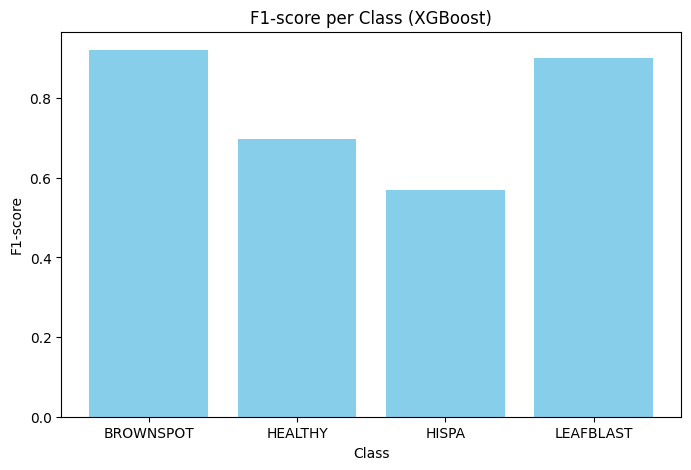

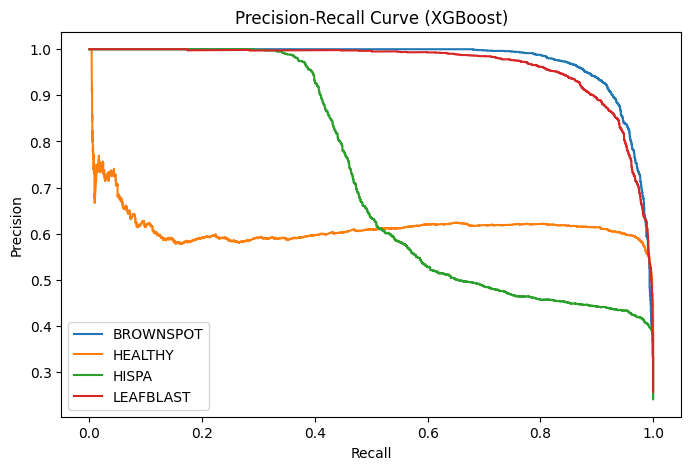

Learning curves not available. Retrain with eval_set to plot learning curves.


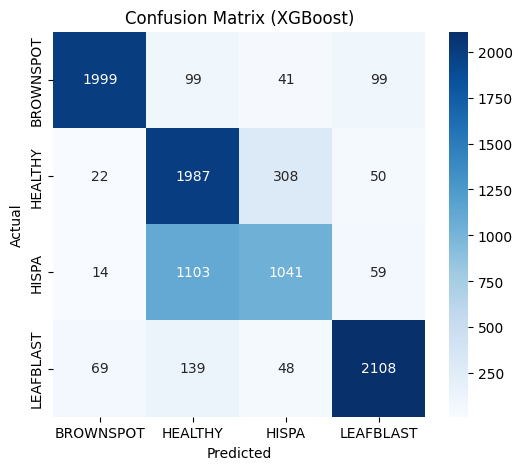

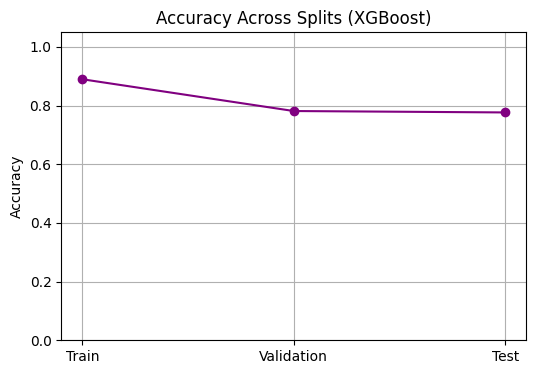

In [5]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ================== LOAD MODEL AND DATA ==================
# Paths
model_path = '/kaggle/input/rice-disease-xgboost-model/rice_disease_xgboost_model.json'  # Update if needed
base_path = '/kaggle/input/resnet50-features/resnet50_features/'

# Load data
X_train = np.load(f'{base_path}X_train.npy')
y_train = np.load(f'{base_path}y_train.npy')
X_val = np.load(f'{base_path}X_val.npy')
y_val = np.load(f'{base_path}y_val.npy')
X_test = np.load(f'{base_path}X_test.npy')
y_test = np.load(f'{base_path}y_test.npy')

# Load trained XGBoost model
model = xgb.XGBClassifier()
model.load_model(model_path)

# Class names (update if needed)
class_names = ['BROWNSPOT', 'HEALTHY', 'HISPA', 'LEAFBLAST']
num_class = len(class_names)

# ================== PREDICTIONS ==================
y_pred_proba = model.predict_proba(X_test)
y_pred_labels = np.argmax(y_pred_proba, axis=1)

# ================== SECTION 1: F1-SCORE PER CLASS ==================
report = classification_report(y_test, y_pred_labels, output_dict=True)
f1_scores = [report[str(i)]['f1-score'] for i in range(num_class)]

plt.figure(figsize=(8, 5))
plt.bar(class_names, f1_scores, color='skyblue')
plt.xlabel('Class')
plt.ylabel('F1-score')
plt.title('F1-score per Class (XGBoost)')
plt.savefig('/kaggle/working/xgb_f1_scores.png')
plt.show()

# ================== SECTION 2: PRECISION-RECALL CURVES ==================
plt.figure(figsize=(8, 5))
for i in range(num_class):
    precision, recall, _ = precision_recall_curve((y_test == i).astype(int), y_pred_proba[:, i])
    plt.plot(recall, precision, label=f'{class_names[i]}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (XGBoost)')
plt.legend()
plt.savefig('/kaggle/working/xgb_precision_recall_curve.png')
plt.show()

# ================== SECTION 3: LEARNING CURVES (IF AVAILABLE) ==================
try:
    results = model.evals_result()
    train_logloss = results['validation_0']['mlogloss']
    val_logloss = results['validation_1']['mlogloss']

    plt.figure(figsize=(8, 5))
    plt.plot(train_logloss, label='Train Loss', color='blue')
    plt.plot(val_logloss, label='Validation Loss', color='red')
    plt.xlabel('Iterations')
    plt.ylabel('Log Loss')
    plt.title('Train vs Validation Loss (XGBoost)')
    plt.legend()
    plt.savefig('/kaggle/working/xgb_train_val_loss.png')
    plt.show()
except Exception as e:
    print("Learning curves not available. Retrain with eval_set to plot learning curves.")

# ================== SECTION 4: CONFUSION MATRIX ==================
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.savefig('/kaggle/working/xgb_confusion_matrix.png')
plt.show()

# ================== SECTION 5: ACCURACY LINE GRAPH ==================
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_pred_labels)

plt.figure(figsize=(6, 4))
plt.plot(['Train', 'Validation', 'Test'], [train_acc, val_acc, test_acc], marker='o', color='purple')
plt.title('Accuracy Across Splits (XGBoost)')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.grid(True)
plt.savefig('/kaggle/working/xgb_accuracy_splits.png')
plt.show()


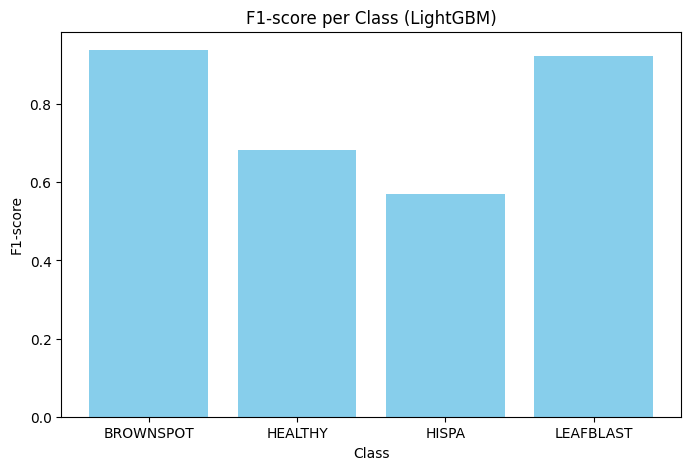

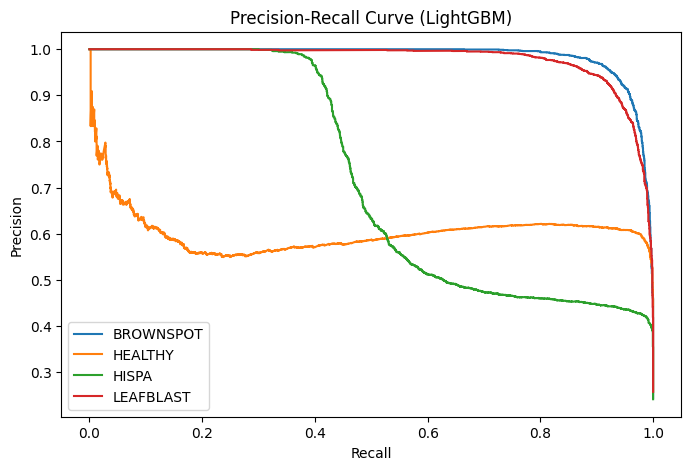

Learning curves not available. Retrain with valid_sets and record evals_result_ to plot learning curves.


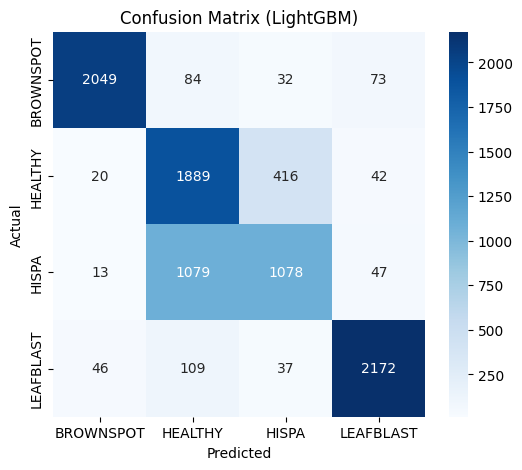

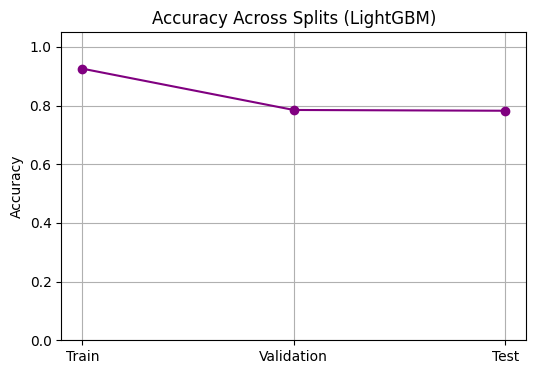

In [3]:
import numpy as np
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ================== LOAD MODEL AND DATA ==================
# Paths
model_path = '//kaggle/input/rice-disease-lgbm-model/rice_disease_lgbm_model.txt'  # Update with your actual path
base_path = '/kaggle/input/resnet50-features/resnet50_features/'

# Load data
X_train = np.load(f'{base_path}X_train.npy')
y_train = np.load(f'{base_path}y_train.npy')
X_val = np.load(f'{base_path}X_val.npy')
y_val = np.load(f'{base_path}y_val.npy')
X_test = np.load(f'{base_path}X_test.npy')
y_test = np.load(f'{base_path}y_test.npy')

# Load trained LightGBM model
gbm = lgb.Booster(model_file=model_path)

# Class names (update if needed)
class_names = ['BROWNSPOT', 'HEALTHY', 'HISPA', 'LEAFBLAST']
num_class = len(class_names)

# ================== PREDICTIONS ==================
y_pred_proba = gbm.predict(X_test)
y_pred_labels = np.argmax(y_pred_proba, axis=1)

# ================== SECTION 1: F1-SCORE PER CLASS ==================
report = classification_report(y_test, y_pred_labels, output_dict=True)
f1_scores = [report[str(i)]['f1-score'] for i in range(num_class)]

plt.figure(figsize=(8, 5))
plt.bar(class_names, f1_scores, color='skyblue')
plt.xlabel('Class')
plt.ylabel('F1-score')
plt.title('F1-score per Class (LightGBM)')
plt.savefig('/kaggle/working/lgbm_f1_scores.png')
plt.show()

# ================== SECTION 2: PRECISION-RECALL CURVES ==================
plt.figure(figsize=(8, 5))
for i in range(num_class):
    precision, recall, _ = precision_recall_curve((y_test == i).astype(int), y_pred_proba[:, i])
    plt.plot(recall, precision, label=f'{class_names[i]}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (LightGBM)')
plt.legend()
plt.savefig('/kaggle/working/lgbm_precision_recall_curve.png')
plt.show()

# ================== SECTION 3: LEARNING CURVES (IF AVAILABLE) ==================
# Only available if you trained with valid_sets and recorded evals_result_
try:
    evals_result = gbm.eval_valid()
    # If you have evals_result_ from sklearn API, use:
    # evals_result = gbm.evals_result_
    train_logloss = evals_result['training']['multi_logloss']
    val_logloss = evals_result['valid_1']['multi_logloss']

    plt.figure(figsize=(8, 5))
    plt.plot(train_logloss, label='Train Loss', color='blue')
    plt.plot(val_logloss, label='Validation Loss', color='red')
    plt.xlabel('Iterations')
    plt.ylabel('Log Loss')
    plt.title('Train vs Validation Loss (LightGBM)')
    plt.legend()
    plt.savefig('/kaggle/working/lgbm_train_val_loss.png')
    plt.show()
except Exception as e:
    print("Learning curves not available. Retrain with valid_sets and record evals_result_ to plot learning curves.")

# ================== SECTION 4: CONFUSION MATRIX ==================
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (LightGBM)')
plt.savefig('/kaggle/working/lgbm_confusion_matrix.png')
plt.show()

# ================== SECTION 5: ACCURACY LINE GRAPH ==================
y_train_pred = np.argmax(gbm.predict(X_train), axis=1)
y_val_pred = np.argmax(gbm.predict(X_val), axis=1)
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_pred_labels)

plt.figure(figsize=(6, 4))
plt.plot(['Train', 'Validation', 'Test'], [train_acc, val_acc, test_acc], marker='o', color='purple')
plt.title('Accuracy Across Splits (LightGBM)')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.grid(True)
plt.savefig('/kaggle/working/lgbm_accuracy_splits.png')
plt.show()
